In [18]:
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from observations import mnist as mnist_obs
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
(x_train, _), (x_test, _) = mnist_obs('./data')

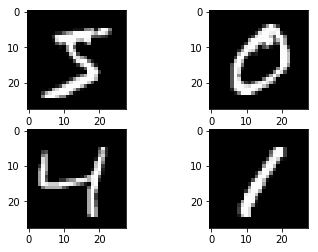

In [3]:
f, axes = plt.subplots(2, 2)
for ax, i in zip(axes.flat[0:], range(4)):
    ax.imshow(x_train[i,:].reshape(28,28),cmap = 'gray')
plt.show()

(60000, 784)
(10000, 784)


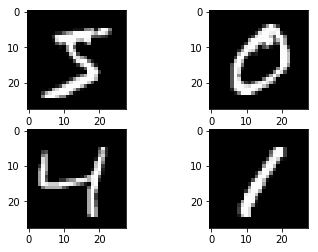

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
f, axes = plt.subplots(2, 2)
for ax, i in zip(axes.flat[0:], range(4)):
    ax.imshow(x_train[i,:].reshape(28,28),cmap = 'gray')
plt.show()

In [5]:
encoding_dim = 256
input_img = Input((28*28,))
encoded = Dense(encoding_dim,activation = 'relu')(input_img)
decoded = Dense(28*28, activation = 'sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test),
          verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.4971 - val_loss: 0.3073
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2869 - val_loss: 0.2739
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2694 - val_loss: 0.2629
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2592 - val_loss: 0.2531
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2495 - val_loss: 0.2432
Epoch 6/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2399 - val_loss: 0.2337
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2307 - val_loss: 0.2248
Epoch 8/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2225 - val_loss: 0.2170
Epoch 9/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2152 - val_loss: 0.2101
Epoch

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

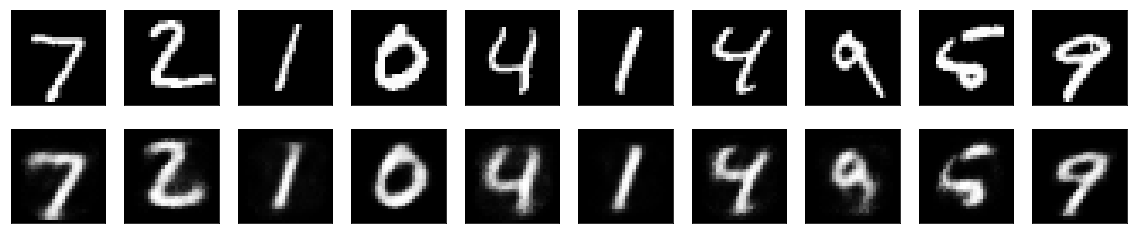

In [8]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
train_encoded = encoder.predict(x_train)
test_encoded = encoder.predict(x_test)
print(train_encoded.shape)
print(test_encoded.shape)
with open('./data/encoded_train_AE.pkl','wb') as f:
    pickle.dump(train_encoded,f)
with open('./data/encoded_test_AE.pkl','wb') as f:
    pickle.dump(test_encoded,f)

(60000, 256)
(10000, 256)


(784, 256)


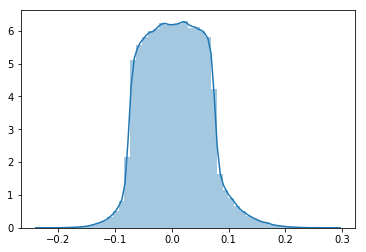

In [21]:
weights = autoencoder.get_weights()
print(weights[0].shape)
sns.distplot(np.ndarray.flatten(weights[0]))
plt.show()

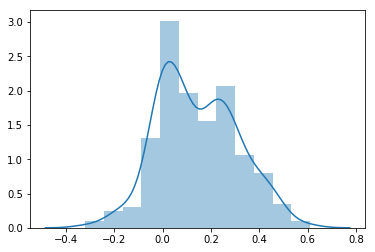

In [22]:
sns.distplot(weights[1])
plt.show()

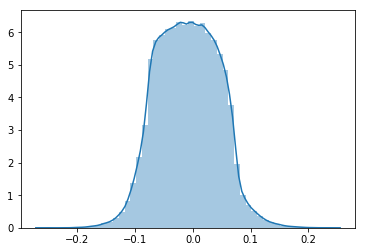

In [23]:
sns.distplot(np.ndarray.flatten(weights[2]))
plt.show()

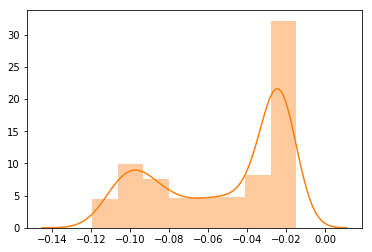

In [25]:
sns.distplot(weights[3])
plt.show()